<a href="https://colab.research.google.com/github/pmukeshreddy/catordogusingvgg16/blob/main/catsvsdogsdeepleaningai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2022-11-22 12:21:21--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  16.2MB/s    in 5.7s    

2022-11-22 12:21:27 (11.5 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

In [3]:
local_zip = "/content/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os
base_dir = "cats_and_dogs_filtered"
print("contents of dicratory are :\n")
print(os.listdir(base_dir))
print("contents of training are:\n")
print(os.listdir(f"{base_dir}/train"))
print("contents of validation are:\n")
print(os.listdir(f"{base_dir}/validation"))

contents of dicratory are :

['train', 'vectorize.py', 'validation']
contents of training are:

['cats', 'dogs']
contents of validation are:

['cats', 'dogs']


In [5]:
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation")

train_cats_dir = os.path.join(train_dir,"cats")
train_dogs_dir = os.path.join(train_dir,"dogs")

validation_cats_dir = os.path.join(validation_dir,"cats")
validation_dogs_dir = os.path.join(validation_dir,"dogs")

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [7]:
print(train_cat_fnames[:10])
print(train_dogs_dir[:10])

['cat.765.jpg', 'cat.49.jpg', 'cat.427.jpg', 'cat.495.jpg', 'cat.479.jpg', 'cat.714.jpg', 'cat.812.jpg', 'cat.302.jpg', 'cat.711.jpg', 'cat.170.jpg']
cats_and_d


In [8]:
print(len(os.listdir("/content/cats_and_dogs_filtered/train/cats")))
print(len(os.listdir("/content/cats_and_dogs_filtered/train/dogs")))

1000
1000


In [9]:
print(len(os.listdir("/content/cats_and_dogs_filtered/validation/cats")))
print(len(os.listdir("/content/cats_and_dogs_filtered/validation/dogs")))

500
500


In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=4

pic_index = 0

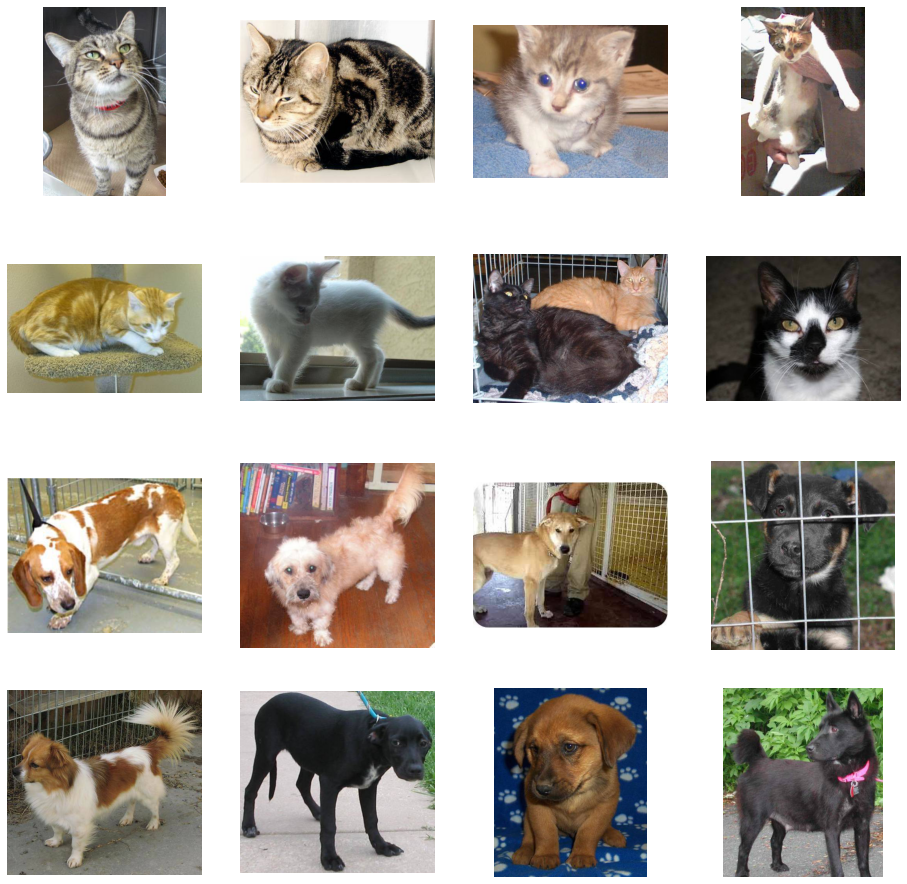

In [15]:
fig = plt.gcf()
fig.set_size_inches(nrows*4,ncols*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,image in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis("off")
  img = mpimg.imread(image)
  plt.imshow(img)

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential


In [53]:
model = VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

In [54]:
model.trainable = False

In [55]:
flatten = Flatten()
dense = Dense(50,activation="relu")
dense2 = Dense(20,activation="relu")
dense3 = Dense(1,activation="sigmoid")

In [56]:
model = Sequential([model,flatten,dense,dense2,dense3])

In [57]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_genrator = train_datagen.flow_from_directory("/content/cats_and_dogs_filtered/train",batch_size=20,class_mode="binary",target_size=(150,150))
test_genrator = test_datagen.flow_from_directory("/content/cats_and_dogs_filtered/validation",batch_size=20,class_mode="binary",target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [60]:
history = model.fit(train_genrator,steps_per_epoch=100,epochs=15,validation_data=test_genrator,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 13s - loss: 0.4497 - accuracy: 0.7880 - val_loss: 0.2853 - val_accuracy: 0.8750 - 13s/epoch - 128ms/step
Epoch 2/15
100/100 - 11s - loss: 0.2719 - accuracy: 0.8865 - val_loss: 0.2838 - val_accuracy: 0.8780 - 11s/epoch - 110ms/step
Epoch 3/15
100/100 - 11s - loss: 0.2100 - accuracy: 0.9150 - val_loss: 0.2752 - val_accuracy: 0.8780 - 11s/epoch - 111ms/step
Epoch 4/15
100/100 - 11s - loss: 0.1610 - accuracy: 0.9385 - val_loss: 0.2639 - val_accuracy: 0.8920 - 11s/epoch - 111ms/step
Epoch 5/15
100/100 - 11s - loss: 0.1263 - accuracy: 0.9520 - val_loss: 0.4620 - val_accuracy: 0.8310 - 11s/epoch - 111ms/step
Epoch 6/15
100/100 - 12s - loss: 0.1042 - accuracy: 0.9555 - val_loss: 0.3121 - val_accuracy: 0.8850 - 12s/epoch - 118ms/step
Epoch 7/15
100/100 - 12s - loss: 0.0843 - accuracy: 0.9670 - val_loss: 0.3060 - val_accuracy: 0.8940 - 12s/epoch - 118ms/step
Epoch 8/15
100/100 - 11s - loss: 0.0630 - accuracy: 0.9745 - val_loss: 0.3969 - val_accuracy: 0.8800 - 11s/epoch - 110

In [67]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img,img_to_array

uploaded = files.upload()
for fn in uploaded.keys():
  path = "/content/" + fn
  img = load_img(path,target_size=(150,150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x,axis=0)
  x = np.vstack([x])
  classes = model.predict(x,batch_size=10)
  print(classes[0])
  if (classes[0]>0.5):
    print(fn + "is a dog")
  else:
    print(fn+"is a cat")  

Saving NationalGeographic_2572187_2x1.webp to NationalGeographic_2572187_2x1 (3).webp
1/1 [==============================] - 1s 766ms/step
[6.4102073e-07]
NationalGeographic_2572187_2x1.webpis a cat
